In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from altaipony.ffd import FFD

import time
tstamp = time.strftime("%d_%m_%Y_%H_%M", time.localtime())

for att in ['axes.labelsize', 'axes.titlesize', 'legend.fontsize',
            'legend.fontsize', 'xtick.labelsize', 'ytick.labelsize']:
    plt.rcParams[att] = 13

In [2]:
df = pd.read_csv("../flare_tables/20200227_vetted_flares_lacking_some.csv",)
#      names=['ampl_rec','cstart','cstop','ed_rec','ed_rec_err',
#             'istart', 'istop','total_n_valid_data_points', 
#             'tstart', 'tstop',  'dur', 'ed_ratio','ed_ratio_count',
#             'amplitude_ratio','amplitude_ratio_count','duration_ratio','duration_ratio_count',
#             'amplitude_corr','duration_corr','ed_corr','recovery_probability','recovery_probability_count',
#             'ed_ratio_std','amplitude_ratio_std','duration_ratio_std','recovery_probability_std',
#             'ed_corr_err','amplitude_corr_err','duration_corr_err',"TIC","sector","energy","st","real"]


# Only use vetted candidates
df = df[df.real==1]

# Get observing times from the masks
obst = pd.read_csv("../flare_tables/obs_times.csv")

# calculate TIC-wise observing times
o = obst.groupby("TIC").time_years.sum().rename("target_time_years")
obst = obst.merge(o,on="TIC")
obst.st = obst.st.str[1:]

obst

,TIC,sector,st,time_years,target_time_years
0,107012050,10,9,0.058423,0.115108
1,107012050,9,9,0.056685,0.115108
2,11654435,8,6,0.049065,0.049065
3,117733072,5,6,0.064442,0.064442
4,117733581,5,7,0.064442,0.064442
...,...,...,...,...,...
186,77959225,6,6,0.055502,0.119944
187,7975441,8,9,0.049065,0.049065
188,926898,7,2,0.062218,0.111282
189,926898,8,2,0.049065,0.111282


In [3]:
sttobs = obst.groupby("TIC").first().groupby("st").target_time_years.sum()
sttobs

st
0    0.238524
1    0.049065
2    0.169705
6    6.968020
7    2.496783
8    1.289706
9    0.393954
Name: target_time_years, dtype: float64

In [4]:
# plt.hist(df.recovery_probability_count, bins=np.linspace(0,50,10), histtype="step");

# plt.hist(df.ed_ratio_count, bins=np.linspace(0,50,10), histtype="step");

# plt.scatter(df.ampl_rec, df.amplitude_corr)
# plt.plot([0,12],[0,12])

# plt.hist(df.amplitude_ratio_count, bins=np.linspace(0,300,10), histtype="step");

# plt.hist(df.duration_ratio_count, bins=np.linspace(0,300,10), histtype="step");

# plt.scatter(df[df.st==7].ed_rec, df[df.st==7].ed_corr)
# plt.plot([1,3e3],[1,3e3])
# plt.yscale("log")
# plt.xscale("log")

# plt.hist(df.recovery_probability, bins=np.linspace(0,1,6), histtype="step");

# Full sample FFD

In [5]:
tobs = obst.groupby("TIC").first().target_time_years.sum()
tobs

11.605757091794052

Setting ED with new values, size 281.
Setting frequency values with new values, size 281.
Setting frequency adjusted count values with new values, size 281.
Setting ED with new values, size 281.
Setting frequency values with new values, size 281.
Setting frequency adjusted count values with new values, size 281.
Setting ED with new values, size 281.
Setting frequency values with new values, size 281.
Setting frequency adjusted count values with new values, size 405.
Setting multiple_stars flag with True.
Setting ED with new values, size 281.
Setting frequency values with new values, size 281.
Setting frequency adjusted count values with new values, size 2215.
Fitted power law alpha=1.9352020594551655
Fitted power law beta=1219.0247066402774


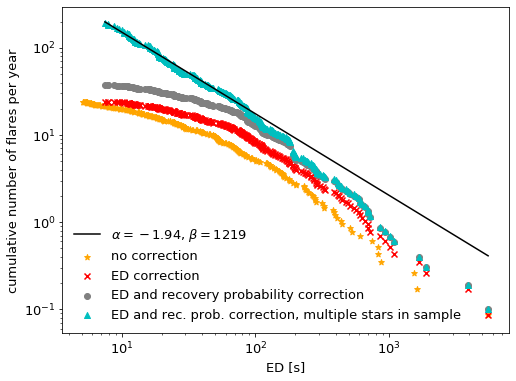

In [6]:
fig, ax =  plt.subplots(1, figsize=(8,6))
ffd = FFD(f=df[df.ed_rec>5], tot_obs_time=tobs, ID="TIC")

#---------- No correction ----------------
ed, freq, counts = ffd.ed_and_freq(energy_correction=False,
                            recovery_probability_correction=False,
                             multiple_stars=False)
ax.scatter(ed, freq, c="orange", marker="*", label="no correction")

#---------- Only ED correction ----------------
ed, freq, counts = ffd.ed_and_freq(energy_correction=True,
                            recovery_probability_correction=False,
                             multiple_stars=False)
ax.scatter(ed, freq, c="r", marker="x", label="ED correction")

#---------- Do both corrections ---------------
ed, freq, counts = ffd.ed_and_freq(energy_correction=True,
                            recovery_probability_correction=True,
                             multiple_stars=False)

ax.scatter(ed, freq, c="grey",label="ED and recovery probability correction")

#---------- Do both corrections and multiple stars 
ed, freq, counts = ffd.ed_and_freq(energy_correction=True,
                            recovery_probability_correction=True,
                             multiple_stars=True)
alpha, alpha_err = ffd.fit_powerlaw()
print(f"Fitted power law alpha={ffd.alpha}")

betas, beta, beta_err = ffd.fit_beta_to_powerlaw()
print(f"Fitted power law beta={ffd.beta}")

ispowerlaw = ffd.is_powerlaw()
truncated = ffd.is_powerlaw_truncated()

ax.scatter(ed, freq, marker="^", c="c", label="ED and rec. prob. correction, multiple stars in sample")
a, x, y = ffd.plot_powerlaw(ax, c="k", label=fr"$\alpha=-${ffd.alpha:.2f}, $\beta=${int(np.rint(ffd.beta))}")

plt.xscale("log")
plt.yscale("log")
plt.legend(frameon=False)
plt.xlabel("ED [s]")
plt.ylabel("cumulative number of flares per year")

plt.savefig(f"../plots/{tstamp}_full_sample_ffd.png", dpi=300)

In [7]:
ed, freq, counts = ffd.ed_and_freq(energy_correction=True,
                            recovery_probability_correction=True,
                             multiple_stars=True)
ffd.alpha, ffd.alph_err =2., 0.
betas, beta2, beta2_err = ffd.fit_beta_to_powerlaw()

Setting multiple_stars flag with True.
Setting ED with new values, size 281.
Setting frequency values with new values, size 281.
Setting frequency adjusted count values with new values, size 2215.


In [8]:
ispowerlaw2 = ffd.is_powerlaw()
ispowerlaw

True

In [9]:
truncated2 = ffd.is_powerlaw_truncated()
truncated

False

In [10]:
with open(f"../tables/{tstamp}_powerlaws.csv", "a") as f:
    firstout = ("date,ID_SpT,alpha,alpha_err,beta,beta_err,"
                "beta2,beta2_err,n,ispowerlaw,truncated,ispowerlaw2,truncated2\n")
    out = (f"{tstamp},all,{alpha},{alpha_err},{beta},{beta_err},{beta2},"
           f"{beta2_err},{ffd.f.shape[0]},{ispowerlaw},{truncated},{ispowerlaw2},{truncated2}\n")
    f.write(firstout)
    f.write(out)

# target-wise FFDs

In [3]:
h = df.groupby("TIC").TIC.count().sort_values(ascending=False).head(8)
h

TIC
142052876    59
388857263    32
29928567     30
167894019    26
272349442    20
29780677     20
220429097    13
395130640     8
Name: TIC, dtype: int64

TIC  142052876  observed for  0.7931781884553957  yrs.
Setting ED with new values, size 51.
Setting frequency values with new values, size 51.
Setting frequency adjusted count values with new values, size 51.
Setting ED with new values, size 51.
Setting frequency values with new values, size 51.
Setting frequency adjusted count values with new values, size 51.
Setting ED with new values, size 51.
Setting frequency values with new values, size 51.
Setting frequency adjusted count values with new values, size 68.
Setting ED with new values, size 51.
Setting frequency values with new values, size 51.
Setting frequency adjusted count values with new values, size 68.
Fitted power law alpha=1.5829274495442704
Fitted power law beta=172.31090351179535
TIC  388857263  observed for  0.12474332648870637  yrs.
Setting ED with new values, size 21.
Setting frequency values with new values, size 21.
Setting frequency adjusted count values with new values, size 21.
Setting ED with new values, size 21.

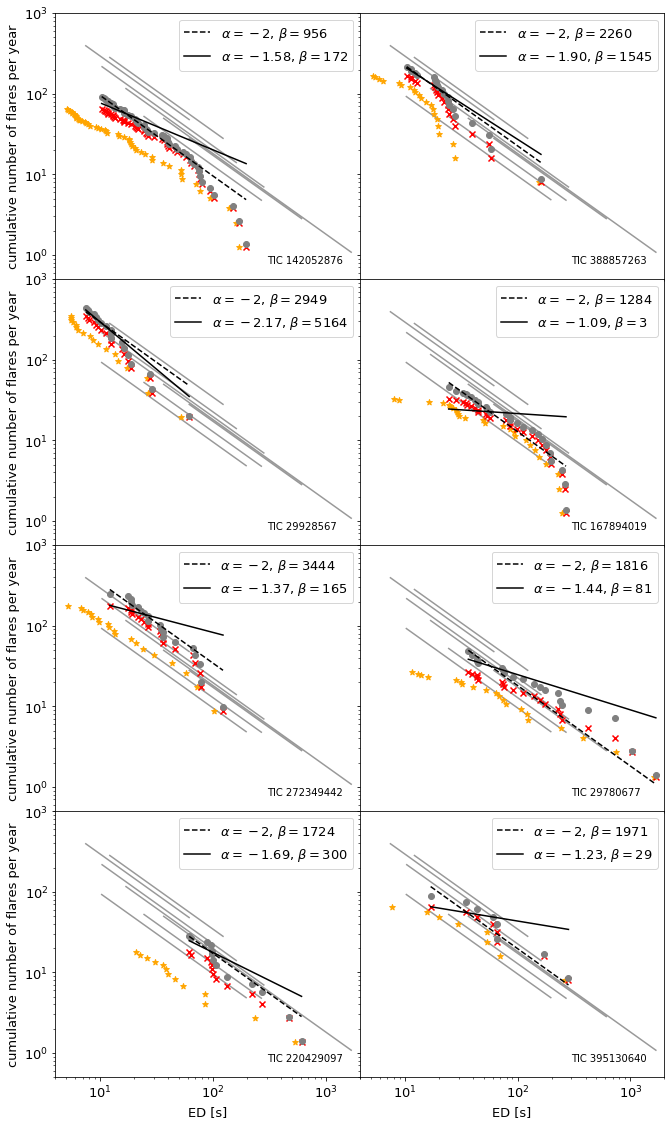

In [9]:
p = []
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(9.5,15.5), sharex=True, sharey=True, squeeze=True)
s, c = 9, "r"
axes = [i for ax in axes for i in ax]
for ax,TIC in zip(axes,h.index):
    d = df[df.TIC==TIC]
    tobs = obst[obst.TIC == int(TIC)].target_time_years.iloc[0]
    print("TIC ", TIC, " observed for ", tobs, " yrs.")
    ffd = FFD(f=d[d.ed_rec>5], tot_obs_time=tobs)
    ffd.alpha, ffd.alpha_err = 2., 0.2
    
    #---------- No correction ----------------
    ed, freq, counts = ffd.ed_and_freq(energy_correction=False,
                                recovery_probability_correction=False,
                                 multiple_stars=False)
    ax.scatter(ed, freq, c="orange", marker="*", )
    
    #---------- Only ED correction ----------------
    ed, freq, counts = ffd.ed_and_freq(energy_correction=True,
                                recovery_probability_correction=False,
                                 multiple_stars=False)
    ax.scatter(ed, freq, c="r", marker="x",)
    
    #---------- Do both corrections ---------------
    
    ed, freq, counts = ffd.ed_and_freq(energy_correction=True,
                                recovery_probability_correction=True,
                                 multiple_stars=False)
    _beta, beta2, beta2_err = ffd.fit_beta_to_powerlaw()
    ax.scatter(ed, freq, c="grey")
    a, x, y = ffd.plot_powerlaw(ax, c="k", linestyle="dashed",
                                label=fr"$\alpha=-${int(ffd.alpha)}, $\beta=${int(np.rint(ffd.beta))}")
    for oax in axes:
        if oax!=ax:
            ffd.plot_powerlaw(oax, c="k", alpha=.4, zorder=0)
    
    ispowerlaw2 = ffd.is_powerlaw()
    truncated2 = ffd.is_powerlaw_truncated()
    
    #---------- Do alpha
    ffd = FFD(f=d[d.ed_rec>5], tot_obs_time=tobs)
    ed, freq, counts = ffd.ed_and_freq(energy_correction=True,
                                recovery_probability_correction=True,
                                 multiple_stars=False)
    alpha, alpha_err = ffd.fit_powerlaw()
    print(f"Fitted power law alpha={ffd.alpha}")
    _beta, beta, beta_err = ffd.fit_beta_to_powerlaw()
    print(f"Fitted power law beta={ffd.beta}")
    ffd.plot_powerlaw(ax, c="k",
                      label=fr"$\alpha=-${ffd.alpha:.2f}, $\beta=${int(np.rint(ffd.beta))}")
    
    ispowerlaw = ffd.is_powerlaw()
    truncated = ffd.is_powerlaw_truncated()
    
    # Add TIC
    ax.text(300, .8, f"TIC {TIC}")
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(.5, 1e3)
    ax.set_xlim(4, 2e3)
    ax.legend()
    
    # ----- Write results for each ----------------------
    
    with open(f"../tables/{tstamp}_powerlaws.csv", "a") as f:
        firstout = ("date,ID_SpT,alpha,alpha_err,beta,beta_err,"
                    "beta2,beta2_err,n,ispowerlaw,truncated,ispowerlaw2,istruncated2\n")
        out = (f"{tstamp},{TIC},{alpha},{alpha_err},{beta},{beta_err},{beta2},"
               f"{beta2_err},{ffd.f.shape[0]},{ispowerlaw},{truncated},{ispowerlaw2},{truncated2}\n")
        #f.write(firstout)
        f.write(out)
    
plt.tight_layout()
axes[0].set_ylabel("cumulative number of flares per year")
axes[2].set_ylabel("cumulative number of flares per year")
axes[4].set_ylabel("cumulative number of flares per year")
axes[-2].set_ylabel("cumulative number of flares per year")
axes[-2].set_xlabel("ED [s]")
axes[-1].set_xlabel("ED [s]")
fig.subplots_adjust(hspace=0, wspace=0, left=0.09)

plt.savefig(f"../plots/{tstamp}_individual_target_ffds.png", dpi=300)

# SpT wise FFDs


In [5]:
h = df.groupby("st").st.count().sort_values(ascending=False).head(4)
h

st
6.0    243
7.0     55
8.0     10
9.0      5
Name: st, dtype: int64

SpT M 6.0  observed for  6.968020381778084  yrs.
Setting ED with new values, size 211.
Setting frequency values with new values, size 211.
Setting frequency adjusted count values with new values, size 211.
Setting ED with new values, size 211.
Setting frequency values with new values, size 211.
Setting frequency adjusted count values with new values, size 211.
Setting ED with new values, size 211.
Setting frequency values with new values, size 211.
Setting frequency adjusted count values with new values, size 297.
Setting multiple_stars flag with True.
Setting ED with new values, size 211.
Setting frequency values with new values, size 211.
Setting frequency adjusted count values with new values, size 1318.
Fitted power law alpha=1.8891500944070998
Fitted power law beta=1030.361691732542
Setting multiple_stars flag with True.
Setting ED with new values, size 211.
Setting frequency values with new values, size 211.
Setting frequency adjusted count values with new values, size 1318.
Fitt

/work1/eilin/Flares_in_Clusters_2/RESULTS_Github/flares-in-clusters-with-k2-ii/flaresinclustersii/lib64/python3.6/site-packages/altaipony-0.0.1-py3.6.egg/altaipony/ffd.py:382: UserWarning: Power law exponent is steep. Power of statistical tests decreases according to Maschberger and Kroupa 2009.
  warnings.warn('Power law exponent is steep. '


Setting multiple_stars flag with True.
Setting ED with new values, size 55.
Setting frequency values with new values, size 55.
Setting frequency adjusted count values with new values, size 269.
Fitted power law beta=2484.2373967950994
SpT M 8.0  observed for  1.2897064415544905  yrs.
Setting ED with new values, size 10.
Setting frequency values with new values, size 10.
Setting frequency adjusted count values with new values, size 10.
Setting ED with new values, size 10.
Setting frequency values with new values, size 10.
Setting frequency adjusted count values with new values, size 10.
Setting ED with new values, size 10.
Setting frequency values with new values, size 10.
Setting frequency adjusted count values with new values, size 18.
Setting multiple_stars flag with True.
Setting ED with new values, size 10.
Setting frequency values with new values, size 10.
Setting frequency adjusted count values with new values, size 34.
Fitted power law alpha=3.2155905330882386
Fitted power law b

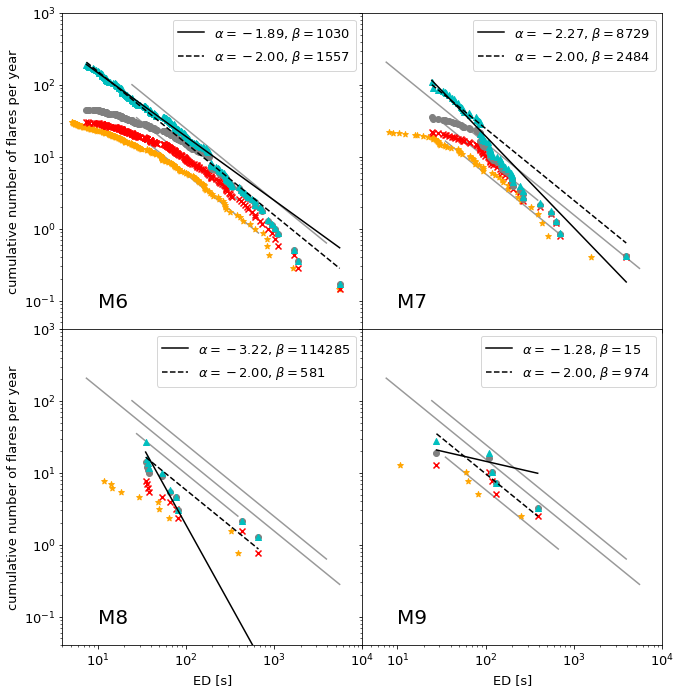

In [6]:
p = []
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(9.5,9.5), sharex=True, sharey=True, squeeze=True)
s, c = 9, "r"
axes = [i for ax in axes for i in ax]
for ax,st in zip(axes,h.index):
    d = df[df.st==st]
    tobs =  sttobs[str(int(st))]
    print("SpT M", st, " observed for ", tobs, " yrs.")
    ffd = FFD(f=d[d.ed_rec>5], tot_obs_time=tobs, ID="TIC")
    ffd.alpha, ffd.alpha_err = 2., 0.2
    
    #---------- No correction ----------------
    ed, freq, counts = ffd.ed_and_freq(energy_correction=False,
                                recovery_probability_correction=False,
                                 multiple_stars=False)
    ax.scatter(ed, freq, c="orange", marker="*", )
    
    #---------- Only ED correction ----------------
    ed, freq, counts = ffd.ed_and_freq(energy_correction=True,
                                recovery_probability_correction=False,
                                 multiple_stars=False)
    ax.scatter(ed, freq, c="r", marker="x",)
    
    #---------- Do both corrections ---------------
    ed, freq, counts = ffd.ed_and_freq(energy_correction=True,
                                recovery_probability_correction=True,
                                 multiple_stars=False)
    _beta, ffd.beta, ffd.beta_err = ffd.fit_beta_to_powerlaw()
    ax.scatter(ed, freq, c="grey")

    #---------- Do both corrections and multiple stars 
    ed, freq, counts = ffd.ed_and_freq(energy_correction=True,
                                recovery_probability_correction=True,
                                 multiple_stars=True)
    alpha, alpha_err = ffd.fit_powerlaw()
    print(f"Fitted power law alpha={ffd.alpha}")
    betas, beta, beta_err = ffd.fit_beta_to_powerlaw()
    print(f"Fitted power law beta={ffd.beta}")
    ax.scatter(ed, freq, marker="^", c="c", )
    ffd.plot_powerlaw(ax, c="k",
                                label=fr"$\alpha=-${ffd.alpha:.2f}, $\beta=${int(np.rint(ffd.beta))}")

    ispowerlaw = ffd.is_powerlaw()
    truncated = ffd.is_powerlaw_truncated()
    
    #--------- Fix alpha=2 ----------------------------------------
    ed, freq, counts = ffd.ed_and_freq(energy_correction=True,
                                recovery_probability_correction=True,
                                 multiple_stars=True)
    ffd.alpha, ffd.alpha_err = 2., .2
    betas, beta2, beta2_err = ffd.fit_beta_to_powerlaw()
    print(f"Fitted power law beta={ffd.beta}")
    
    ispowerlaw2 = ffd.is_powerlaw()
    truncated2 = ffd.is_powerlaw_truncated()
    
    for oax in axes:
        if oax!=ax:
            ffd.plot_powerlaw(oax, c="k", alpha=.4, zorder=0)
    
    ffd.plot_powerlaw(ax, c="k", linestyle="dashed",
                                label=fr"$\alpha=-${ffd.alpha:.2f}, $\beta=${int(np.rint(ffd.beta))}")
    
    ax.text(10, .08, f"M{int(st)}", fontsize=20)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(.04, 1e3)
    ax.set_xlim(4, 1e4)
    ax.legend()
    
    # ----- Write results for each ----------------------
    
    with open(f"../tables/{tstamp}_powerlaws.csv", "a") as f:
        firstout = ("date,ID_SpT,alpha,alpha_err,beta,beta_err,"
                    "beta2,beta2_err,n,ispowerlaw,truncated,ispowerlaw2,truncated2\n")
        out = (f"{tstamp},M{st},{alpha},{alpha_err},{beta},{beta_err},{beta2},"
               f"{beta2_err},{ffd.f.shape[0]},{ispowerlaw},{truncated},{ispowerlaw2},{truncated2}\n")
        #f.write(firstout)
        f.write(out)
    
plt.tight_layout()
axes[0].set_ylabel("cumulative number of flares per year")
axes[2].set_ylabel("cumulative number of flares per year")
axes[2].set_xlabel("ED [s]")
axes[3].set_xlabel("ED [s]")
fig.subplots_adjust(hspace=0, wspace=0, left=0.09)

plt.savefig(f"../plots/{tstamp}_spt_ffds.png", dpi=300)